# Demonstration CommonRoad-Search
We show how to use (un)informed search algorithms within CommonRoad Search and apply them to a real motion planning problem. For more detailed tutorials, please refer to the [tutorial folder](https://gitlab.lrz.de/tum-cps/commonroad-search/-/tree/master/tutorials) of the CommonRoad search repository

In [1]:
# set necessary paths
import os
import sys

# add the root folder to python path
path_notebook = os.getcwd()
sys.path.append(os.path.join(path_notebook, "../"))

In [2]:
# necessary imports
import matplotlib.pyplot as plt
from IPython import display

from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object

from SMP.motion_planner.motion_planner import MotionPlanner, MotionPlannerType
from SMP.maneuver_automaton.maneuver_automaton import ManeuverAutomaton
from SMP.motion_planner.utility import plot_primitives, display_steps

## 1. Using (un)informed search algorithms
### 1.1. Load scenario

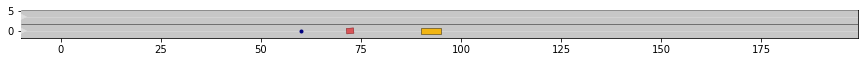

In [3]:
# load scenario
path_scenario = os.path.join(path_notebook, "../scenarios/tutorial/")
id_scenario = 'ZAM_Tutorial_Urban-3_2'

# read in scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(path_scenario + id_scenario + '.xml').open()
# retrieve the first planning problem in the problem set
planning_problem = list(planning_problem_set.planning_problem_dict.values())[0]
    
# plot the scenario and the planning problem set
plt.figure(figsize=(15, 5))
draw_object(scenario)
draw_object(planning_problem_set)
plt.gca().set_aspect('equal')
plt.margins(0, 0)
plt.show()

### 1.2. Generate maneuver automaton
In the following, we load the **pre-generated motion primitives** from an XML-File, and generate a Maneuver Automaton out of them. The maneuver automaton used for this tutorial consists of **7 motion primitives**; the connectivity within the motion primitives are also computed and stored.

Reading motion primitives from file V_9.0_9.0_Vstep_0_SA_-0.2_0.2_SAstep_0.2_T_0.5_Model_BMW_320i.xml



Automaton created.
Number of loaded primitives: 7


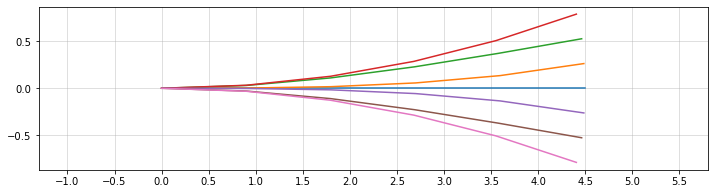

In [4]:
# load the xml with stores the motion primitives
name_file_motion_primitives = 'V_9.0_9.0_Vstep_0_SA_-0.2_0.2_SAstep_0.2_T_0.5_Model_BMW_320i.xml'

# generate automaton
automaton = ManeuverAutomaton.generate_automaton(name_file_motion_primitives)

# plot motion primitives
plot_primitives(automaton.list_primitives)

### 1.3. Run a search algorithm
Next, we run a search algorithm based on the motion primitives. As an example, we demonstrate the **Breadth-First-Search (BFS)** algorithm.

We create a Motion Planner with Breadth-First-Search using the **MotionPlanner()** class.

In [6]:
# construct motion planner
planner_BFS = MotionPlanner.BreadthFirstSearch(scenario=scenario, 
                                               planning_problem=planning_problem,
                                               automaton=automaton)
# prepare input for visualization
scenario_data = (scenario, planner_BFS.state_initial, planner_BFS.shape_ego, planning_problem)

# display search steps
display_steps(scenario_data=scenario_data, algorithm=planner_BFS.execute_search, 
              config=planner_BFS.config_plot)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## 2. Solving a CommonRoad scenario
We demonstrate how to use a search-based motion planner to solve a real-world planning problem.
### 2.1. Load and visualize scenario

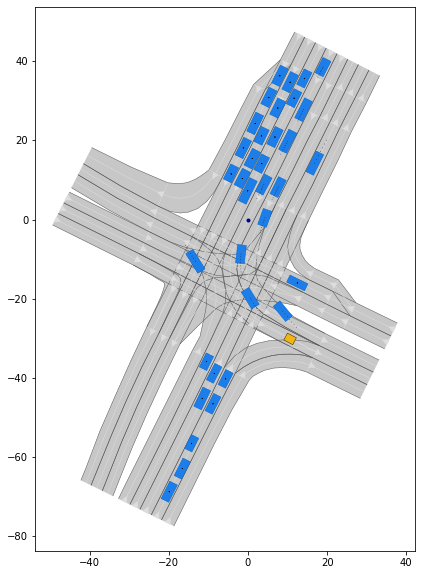

In [7]:
# load scenario
path_scenario = os.path.join(path_notebook, "../scenarios/exercise/")
id_scenario = 'USA_Lanker-1_2_T-1'

# read in scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(path_scenario + id_scenario + '.xml').open()
# retrieve the first planning problem in the problem set
planning_problem = list(planning_problem_set.planning_problem_dict.values())[0]

# visualize scenario
for i in range(0, 50):
    display.clear_output(wait=True)
    plt.figure(figsize=(10, 10))
    draw_object(scenario, draw_params={'time_begin': i})
    draw_object(planning_problem_set)
    
    plt.gca().set_aspect('equal')
    plt.show()

### 2.2. Generate maneuver automaton
similar procedure as above (Sec. 1.2.)

Reading motion primitives from file V_0.0_20.0_Vstep_4.0_SA_-1.066_1.066_SAstep_0.18_T_0.5_Model_BMW_320i.xml



Automaton created.
Number of loaded primitives: 167


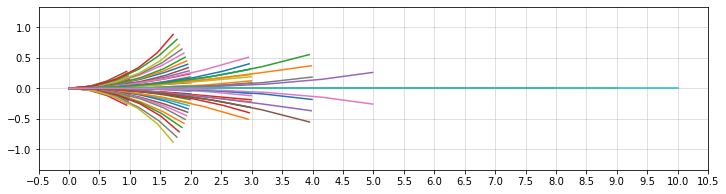

In [8]:
# load the xml with stores the motion primitives
name_file_motion_primitives = 'V_0.0_20.0_Vstep_4.0_SA_-1.066_1.066_SAstep_0.18_T_0.5_Model_BMW_320i.xml'
# generate automaton
automaton = ManeuverAutomaton.generate_automaton(name_file_motion_primitives)
# plot motion primitives
plot_primitives(automaton.list_primitives)

### 2.3. Create a motion planner
In this step, we would like to create a motion planner with the loaded scenario, planning problem, and the automaton. We decide to use an **A*-algorithm** with a simple heuristic.

In [9]:
# specifiy type of planner
type_motion_planner = MotionPlannerType.ASTAR

# construct motion planner
motion_planner = MotionPlanner.create(scenario=scenario, 
                                      planning_problem=planning_problem,
                                      automaton=automaton, 
                                      motion_planner_type=type_motion_planner)

### 2.4. Execute the search

In [10]:
# solve for solution
list_paths_primitives, _, _ = motion_planner.execute_search()

### 2.5. Creating Trajectory object from the planning result
The solutions returned by the motion planner is a list of List[State], which stores the states of the motion primitives constructing the solution trajectory.

In [11]:
from commonroad.scenario.trajectory import State, Trajectory
from SMP.motion_planner.utility import create_trajectory_from_list_states

trajectory_solution = create_trajectory_from_list_states(list_paths_primitives)

Next we visualize the scenario and the planned trajectory of the ego vehicle:

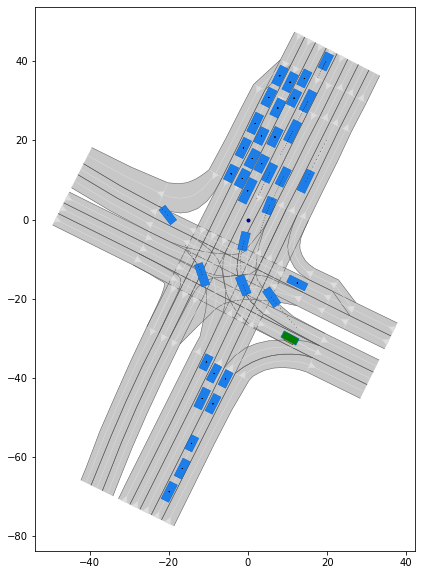

In [14]:
from SMP.motion_planner.utility import visualize_solution
visualize_solution(scenario, planning_problem_set, trajectory_solution)